# Excersice 5

In this excersice we will use the Adaboost algorithm to estimate if we can predict the school students are on based on their academic achievements.
source :http://archive.ics.uci.edu/ml/datasets/Student+Performance

# imports and functions 

In [269]:
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

In [271]:
df1 =pd.read_csv("student/student-mat.csv", sep=";")
# reading csv files
df1.dataframeName = df1

# printing all columns of the dataframe
print(df1.columns.tolist())
df1.head()
# only select the columns that have information on school prestaties 
#X = df1[['G1','G2','G3','failures']]
X = df1[[ 'sex', 'age', 'address', 'famsize', 'Pstatus', 
         'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
         'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']]
y = df1.school

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


<ipython-input-271-5488af477860>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.dataframeName = df1


# Showing the data 

In [272]:
nRow, nCol = X.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 395 rows and 20 columns


In [273]:
print(X.columns)
X.head(20)

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'],
      dtype='object')


,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
0,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,no,no,4,3,4,1,1,3
1,F,17,U,GT3,T,1,1,at_home,other,course,father,1,yes,no,5,3,3,1,1,3
2,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,yes,no,4,3,2,2,3,3
3,F,15,U,GT3,T,4,2,health,services,home,mother,1,yes,yes,3,2,2,1,1,5
4,F,16,U,GT3,T,3,3,other,other,home,father,1,no,no,4,3,2,1,2,5
5,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,yes,no,5,4,2,1,2,5
6,M,16,U,LE3,T,2,2,other,other,home,mother,1,yes,no,4,4,4,1,1,3
7,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,no,no,4,1,4,1,1,1
8,M,15,U,LE3,A,3,2,services,other,home,mother,1,yes,no,4,2,2,1,1,1
9,M,15,U,GT3,T,3,4,other,other,home,mother,1,yes,no,5,5,1,1,1,5


In this section I will explain a bit about the dataset. From this dataset we  

# Applying adaboost to school by personal characteristics

In this section I will explain the setup of the experiment and which method I will use. These are a simple perceptron classifer as well as the ada boost algorithm with multiple hyperparameter settings for learning rate, number of trees and tree depth. 

The question we want to anwser with these predictions is if we can predict the school a student is on given only non school related features like sex, jobs of parents ect. This is intersting to see if these factors can predict which school a child attends it also can give insights into what unconsious biases are around for chosing a school. 

In [274]:
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
X = pd.get_dummies(X)
# Import train_test_split function
random.seed(10)
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


# simple classifier 

In [275]:
random.seed(10)
from sklearn.linear_model import Perceptron
from sklearn import metrics

clf = Perceptron(tol=1e-3, random_state=0)
model_baseline = clf.fit(X_train, y_train)
y_pred_baseline = model_baseline.predict(X_test)

print("Accuracy baseline:",metrics.accuracy_score(y_test, y_pred_baseline))

Accuracy baseline: 0.7563025210084033


# Adaboost experiments

In the part below we do some experiments on our dataset with number of trees, learning rate and tree depth. The code to visualise this was modified from : https://machinelearningmastery.com/adaboost-ensemble-in-python/. On the y-axis is always the accuracy while on the x-axis is the tested parameter 

number of trees  mean accuracy std accuracy
>10 0.875 (0.055)
number of trees  mean accuracy std accuracy
>50 0.879 (0.053)
number of trees  mean accuracy std accuracy
>100 0.873 (0.054)
number of trees  mean accuracy std accuracy
>500 0.860 (0.056)
number of trees  mean accuracy std accuracy
>1000 0.847 (0.059)
number of trees  mean accuracy std accuracy
>5000 0.845 (0.049)


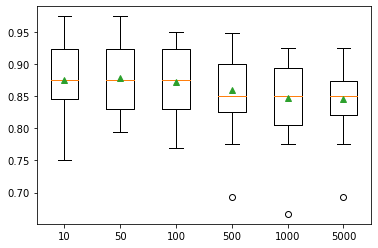

In [277]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(n_estimators=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = X, y
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print ("number of trees,", " mean accuracy,", "std accuracy")
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

depth of trees,  mean accuracy, std accuracy
>1 0.879 (0.053)
depth of trees,  mean accuracy, std accuracy
>2 0.876 (0.055)
depth of trees,  mean accuracy, std accuracy
>3 0.888 (0.036)
depth of trees,  mean accuracy, std accuracy
>4 0.908 (0.031)
depth of trees,  mean accuracy, std accuracy
>5 0.902 (0.031)
depth of trees,  mean accuracy, std accuracy
>6 0.898 (0.029)
depth of trees,  mean accuracy, std accuracy
>7 0.907 (0.029)
depth of trees,  mean accuracy, std accuracy
>8 0.892 (0.035)
depth of trees,  mean accuracy, std accuracy
>9 0.864 (0.054)
depth of trees,  mean accuracy, std accuracy
>10 0.854 (0.048)


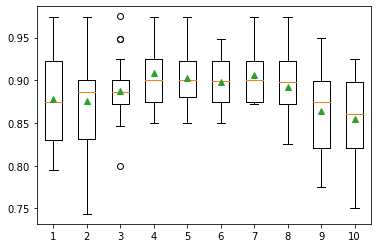

In [280]:
#X = pd.get_dummies(X)
# explore adaboost ensemble tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 10
    for i in range(1,11):
        # define base model
        base = DecisionTreeClassifier(max_depth=i)
        # define ensemble model
        models[str(i)] = AdaBoostClassifier(base_estimator=base)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = X, y
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print ("depth of trees,", " mean accuracy,", "std accuracy")
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

learning rate,  mean accuracy, std accuracy
>0.100 0.893 (0.024)
learning rate,  mean accuracy, std accuracy
>0.200 0.890 (0.031)
learning rate,  mean accuracy, std accuracy
>0.300 0.891 (0.035)
learning rate,  mean accuracy, std accuracy
>0.400 0.891 (0.046)
learning rate,  mean accuracy, std accuracy
>0.500 0.885 (0.044)
learning rate,  mean accuracy, std accuracy
>0.600 0.884 (0.045)
learning rate,  mean accuracy, std accuracy
>0.700 0.884 (0.045)
learning rate,  mean accuracy, std accuracy
>0.800 0.884 (0.052)
learning rate,  mean accuracy, std accuracy
>0.900 0.880 (0.053)
learning rate,  mean accuracy, std accuracy
>1.000 0.879 (0.053)
learning rate,  mean accuracy, std accuracy
>1.100 0.876 (0.053)
learning rate,  mean accuracy, std accuracy
>1.200 0.874 (0.063)
learning rate,  mean accuracy, std accuracy
>1.300 0.875 (0.055)
learning rate,  mean accuracy, std accuracy
>1.400 0.878 (0.054)
learning rate,  mean accuracy, std accuracy
>1.500 0.874 (0.050)
learning rate,  mean accu

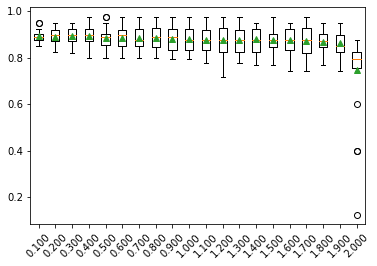

In [279]:
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    for i in arange(0.1, 2.1, 0.1):
        key = '%.3f' % i
        models[key] = AdaBoostClassifier(learning_rate=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = X, y
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print ("learning rate,", " mean accuracy,", "std accuracy")
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

# Summary 

From the results we can see that the perceptron performs good and some of the adaboost models perform very good on this task. We can especially see the high performance in the different tree depth experiments. From these results we can conclude that we can predict the schools of the student on basis of there non academic charactheristics present. Therefore, there might be a bias present that needs further invesitgation. 